# Utilizing player age & experience level to predict average playtime

## Introduction

Video games have exploded in popularity in recent years, becoming a dominant form of entertainment and fostering massive global communities. With the rise of multiplayer online games like Minecraft, understanding player behaviour has become crucial for managing servers and optimizing resources. This project leverages data on player activity to uncover patterns and inform strategies for sustaining engagement.


In the project, we will address: **Can we predict the session duration of a player through their age and experience level?**

The Pacific Laboratory for Artificial Intelligence (PLAI) at UBC collected the data for the 2 datasets by setting up a Minecraft server where players' actions are recorded as they navigate through the world. Using this data, the question can be answered.

---

### Dataset #1: players.csv (A list of all unique players, including data about each player)

- Number of observations: 196
- Number of variables: 9

| Variable | Type | Description |
|:--------:|:--------:|:--------:|
|  experience   |  categorical   |  Player's experience level (e.g., Beginner, Amateur, Regular, Veteran, Pro)  |
|  subscribe   |  categorical  |  Indicates whether the player subscribes to a service (TRUE/FALSE)   |
|  hashedEmail   |  categorical   |  Unique identifier for each player  |
|  played_hours   |  quantitative   |  Total hours played by the player  |
|  name   |  categorical   |  Name of the player  |
|  gender   |  categorical   |  Gender of the player (e.g., Male, Female, Non-binary, Prefer not to say)  |
|  age   |  quantitative   |  Age of the player  |
|  individualId   |  categorical   |  Unique individual ID  |
|  organizationName   |  categorical   |  Identifier for the organization the player may be associated with (if any)  |

---

### Dataset #2: sessions.csv (A list of individual play sessions by each player, including data about the session)

- Number of observations: 1535
- Number of variables: 5

| Variable | Type | Description |
|:--------:|:--------:|:--------:|
|  hashedEmail   |  categorical   |  Unique identifier for each player  |
|  start_time   |  quantitative  |  The start time of each play session  |
|  end_time   |  quantitative   |  The end time of each play session  |
|  original_start_time   |  quantitative   |  Scheduled start time (UNIX timestamp format)  |
|  original_end_time   |  quantitative   |  Scheduled end time (UNIX timestamp format)  |

---

Furthermore, we will use **age** and **experience** from the players.csv dataset as predictors to predict the average hours a player will play in Minecraft.

## Methods & Results

#### Preliminary exploratory data analysis:

Step 1) Imported libraries along with player & session data from google drive links

Step 2) Cleaned and tidied data by removing irrelevant variables from datasets and adding individual date & time columns

Step 3) Split the data into training and testing sets (only working with the training set until the very end)

Step 4) Summarized the training set to make predictions

Step 5) Visualized the training dataset

#### Linear regression:

Step 1) Created a linear regression model using **linear_reg** 

Step 2) Utilized the **recipe** function to center and scale the data

Step 3) Established a workflow to combine model and recipe

#### Visualizing the results
Step 1) Made a grid useful for visualizing and predicting across age and experience combinations using **distinct** and **pull** functions

Step 2) Used **expand.grid** to create a dataframe with all possible combinations of ages and experiences

Step 3) Superimpose dataframe onto prediction lines on the scatter plot to qualitatively assess if the model seems to fit the data well through **predict** and **blind_cols** functions

Step 4) Visualized the results via scatterplot from linear regression


### Preliminary exploratory data analysis:

#### Importing libraries

In [1]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Importing Player & Session Datasets

We utilized **read_csv** to import the player & session datasets from the Google Drive URLs

In [2]:
players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
sessions_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"

raw_players <- read_csv(players_url)
raw_sessions <- read_csv(sessions_url)

head(raw_players)
head(raw_sessions)

nrow(raw_players)
nrow(raw_sessions)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[1] 196

[1] 1535

Player dataset contains columns that are either categorical or quantitative. Moreover, the **start_time** and **end_time** variables in the Session dataset contains both date & time. As such, they will need to be separated. 

### Cleaning and Wrangling the data

Some columns in the player & session datasets will be irrelevant to predicting the average hours a player will play. Therefore, they will be removed. The **start_time** and **end_time** variables were converted into Date-Time columns using the POSIXct format. This is useful for session duration calculations. We also added a column to note a session's duration in minutes. Finally, a combined dataset was created to be used later in the planned analysis.

In [3]:
set.seed(2024)
# Cleaning and wrangling data

# Remove subscription, gender, individualId, and organizationName variables from player dataset
players <- select(raw_players, experience, hashedEmail, played_hours, name, age)
head(players)

#Turn start_time and end_time into <dttm> and also find each session duration
wrangled_session_data <- raw_sessions |>
    mutate(start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"), end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")) |>
    mutate(session_duration = as.numeric(difftime(end_time, start_time, units = "mins")))

# Remove original_start_time & original_end_time from session dataset and include session_duration
sessions <- select(wrangled_session_data, hashedEmail, start_time, end_time, session_duration)

head(sessions)

#Variable to join the players.csv and sessions.csv together in a clean format
joined_data <- merge(players, sessions, by = "hashedEmail")

head(joined_data)

experience,hashedEmail,played_hours,name,age
<chr>,<chr>,<dbl>,<chr>,<dbl>
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9
Veteran,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,17
Veteran,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,17
Amateur,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,21
Regular,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,21
Amateur,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,17


hashedEmail,start_time,end_time,session_duration
<chr>,<dttm>,<dttm>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,13
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,23
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,36
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,11
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,122


,hashedEmail,experience,played_hours,name,age,start_time,end_time,session_duration
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>
1,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,1.5,Isaac,20,2024-05-23 00:22:00,2024-05-23 01:07:00,45
2,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,1.5,Isaac,20,2024-05-22 23:12:00,2024-05-23 00:13:00,61
3,060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,0.4,Lyra,21,2024-06-28 04:28:00,2024-06-28 04:58:00,30
4,0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,0.1,Osiris,17,2024-09-19 21:01:00,2024-09-19 21:12:00,11
5,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,2024-08-30 03:40:00,2024-08-30 04:04:00,24
6,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,2024-08-27 19:18:00,2024-08-27 19:52:00,34


### Splitting the data into training & testing sets

Before working on our model, we need to split the data into training and testing sets. Additionally, since we want to predict the new column **session_duration**, we will be using stratification based on this column.

Moreover, we will utilize **initial_split** to split the dataframe into 66.6% training and 33.3% testing since it shuffles the data for us and ensures that a constant proportion of each class is present in both. Furthermore, the 2:1 split allows us to train our model on as many data points as possible while also keeping enough data for effective testing later.

In [4]:
#Creating Training and Testing data splits
data_split <- initial_split(joined_data, prop = 2/3, strata = session_duration)

data_training <- training(data_split)
data_testing <- testing(data_split)

head(data_training)
head(data_testing)

,hashedEmail,experience,played_hours,name,age,start_time,end_time,session_duration
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>
1,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,2024-08-30 15:48:00,2024-08-30 15:55:00,7
2,18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,Amateur,17.2,Kyrie,14,2024-06-30 06:23:00,2024-06-30 06:31:00,8
3,18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,Amateur,17.2,Kyrie,14,2024-07-08 05:20:00,2024-07-08 05:28:00,8
4,18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,Amateur,17.2,Kyrie,14,2024-06-24 18:49:00,2024-06-24 18:55:00,6
5,18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,Amateur,17.2,Kyrie,14,2024-06-24 05:04:00,2024-06-24 05:08:00,4
6,18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,Amateur,17.2,Kyrie,14,2024-06-24 04:58:00,2024-06-24 05:04:00,6


,hashedEmail,experience,played_hours,name,age,start_time,end_time,session_duration
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>
1,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,2024-08-31 03:14:00,2024-08-31 03:59:00,45
2,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,2024-08-31 02:29:00,2024-08-31 03:12:00,43
3,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,2024-08-30 16:18:00,2024-08-30 16:38:00,20
4,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,2024-09-01 21:59:00,2024-09-01 22:36:00,37
5,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,2024-08-24 02:41:00,2024-08-24 02:46:00,5
6,0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,Pro,1.0,Knox,17,2024-04-22 21:41:00,2024-04-22 22:04:00,23


### Summarizing the data

In [5]:
#Finding the most common ages
mode_age_count <- data_training|>
            group_by(age)|>
            summarize(count = n())|>
            arrange(-count)
head(mode_age_count)

#Finding the average age
mean_age <- data_training |>
    summarize(mean_age = mean(age), sd_age = sd(age))
mean_age

#Finding the outlier ages so it can be removed during further analysis
mean_age_val <- mean_age |>
    select(mean_age) |>
    pull()
sd_age_val <- mean_age |>
    select(sd_age) |>
    pull()

outlier_age <- mean_age_val + 3 * sd_age_val
outlier_age

age,count
<dbl>,<int>
17,348
23,208
16,112
19,105
20,71
22,55


mean_age,sd_age
<dbl>,<dbl>
19.20548,4.360904


[1] 32.28819

### Visualization

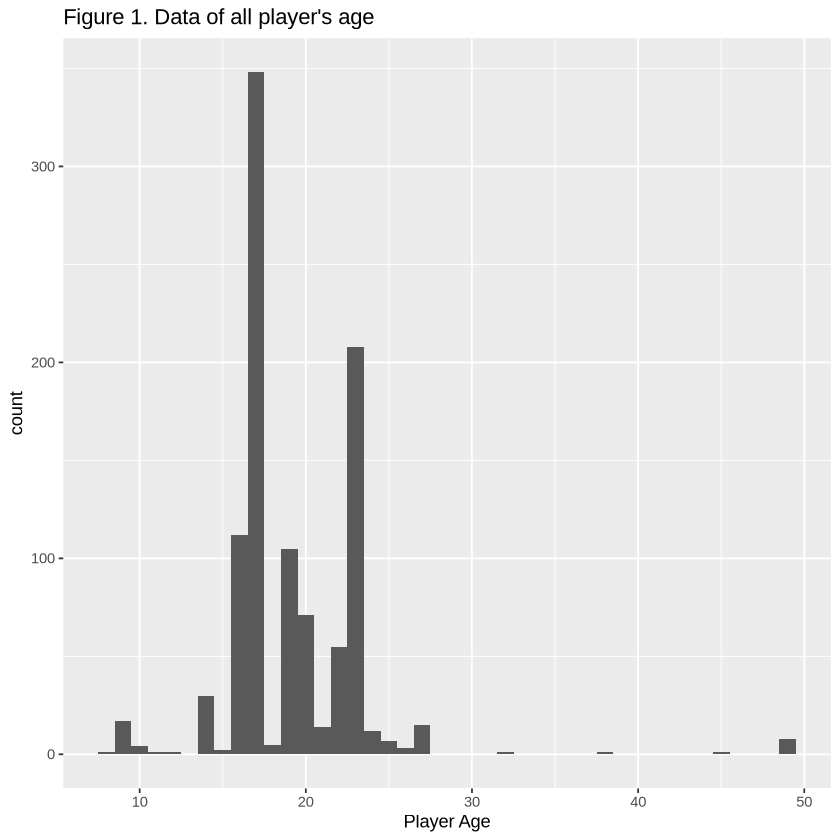

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


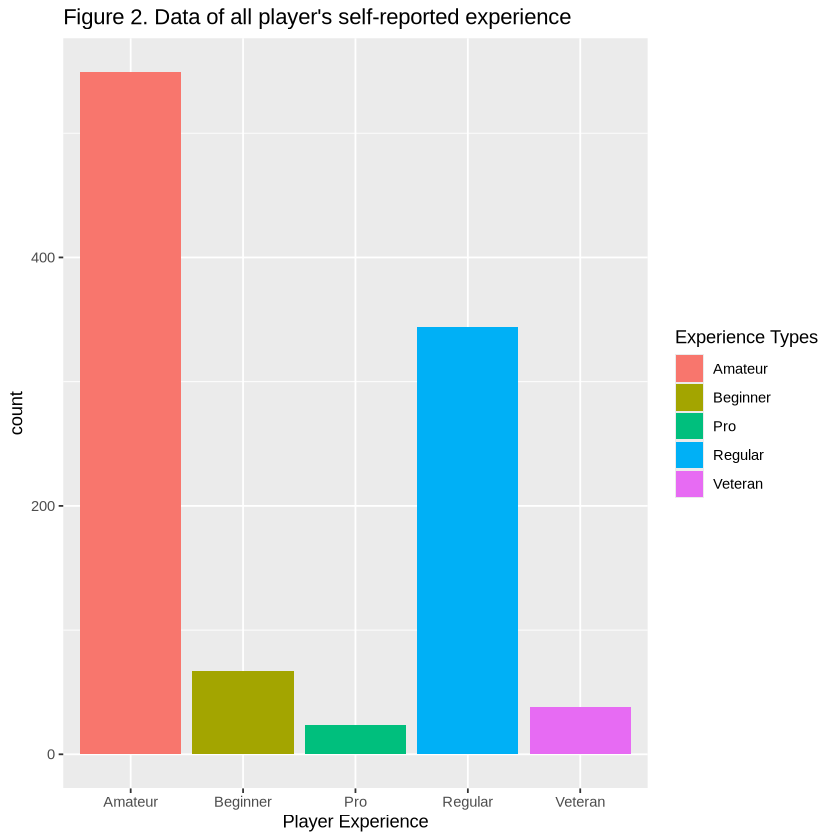

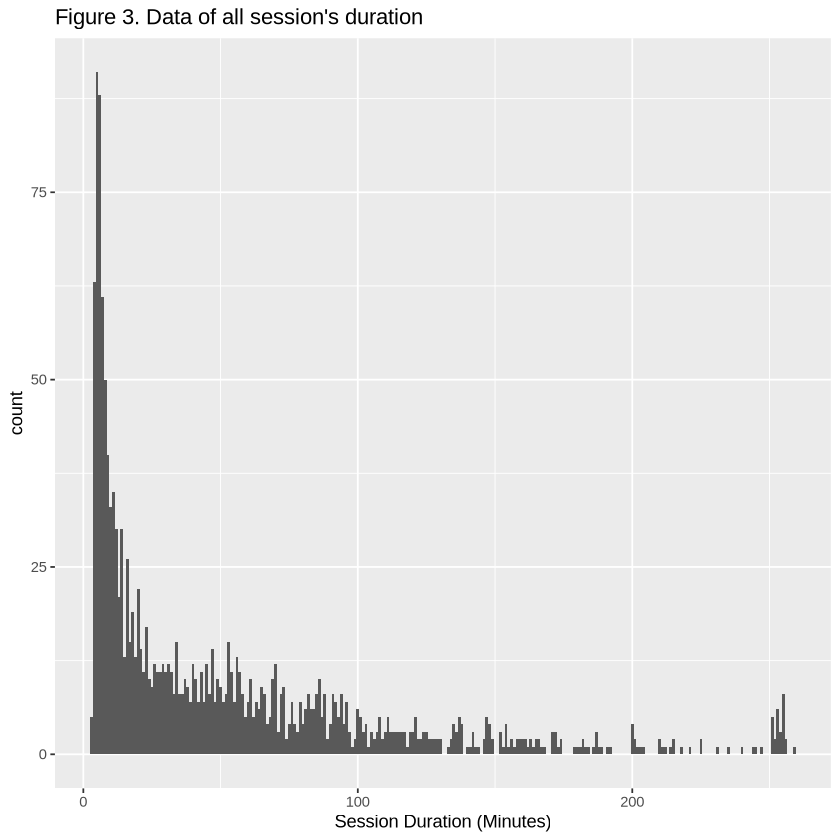

In [6]:
#Figure 1 histogram of age distribution
age_graph <- data_training |>
    ggplot(aes(x = age)) +
    geom_histogram(binwidth = 1) +
    labs(x = "Player Age", title = "Figure 1. Data of all player's age")
age_graph

#Figure 2 bar plot of experience levels
exp_graph <- data_training |>
    ggplot(aes(x = experience, fill = experience)) +
    geom_bar() +
    labs(x = "Player Experience", title = "Figure 2. Data of all player's self-reported experience", fill = "Experience Types")
exp_graph

#Figure 3 histogram of session_duration distribution
duration_graph <- joined_data |>
    ggplot(aes(x = session_duration)) +
    geom_histogram(binwidth = 1) +
    labs(x = "Session Duration (Minutes)", title = "Figure 3. Data of all session's duration")
duration_graph

### Analysis

There are several interesting trends across the three figures. In Figure 1, the histogram of player ages are skewed to the right with most players in the dataset having a younger average age. The mode of the player ages is seen to be 17 and the second highest peak is at age 23 but there is a sharp decline at age 24. Also there are very few players older than age 30. In Figure 2, there is a bar chart illustrating the distribution of player experience levels with the majority of the players in the sample belonging to “Amateur” or “Regular” while  “Pro” and "Veteran" noticeably had a very few players present. In Figure 3, the histogram of session durations showed a right skew towards longer session durations. Most sessions were brief from 0 to 20 minutes while only a small number of players had sessions above 100 minutes. However, there were some long sessions exceeding 200 minutes. Overall, this initial exploratory data analysis found that the player base is relatively young, fairly mixed in experience levels, with the majority of players providing data through short session durations.


### Further Visualizations of data

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


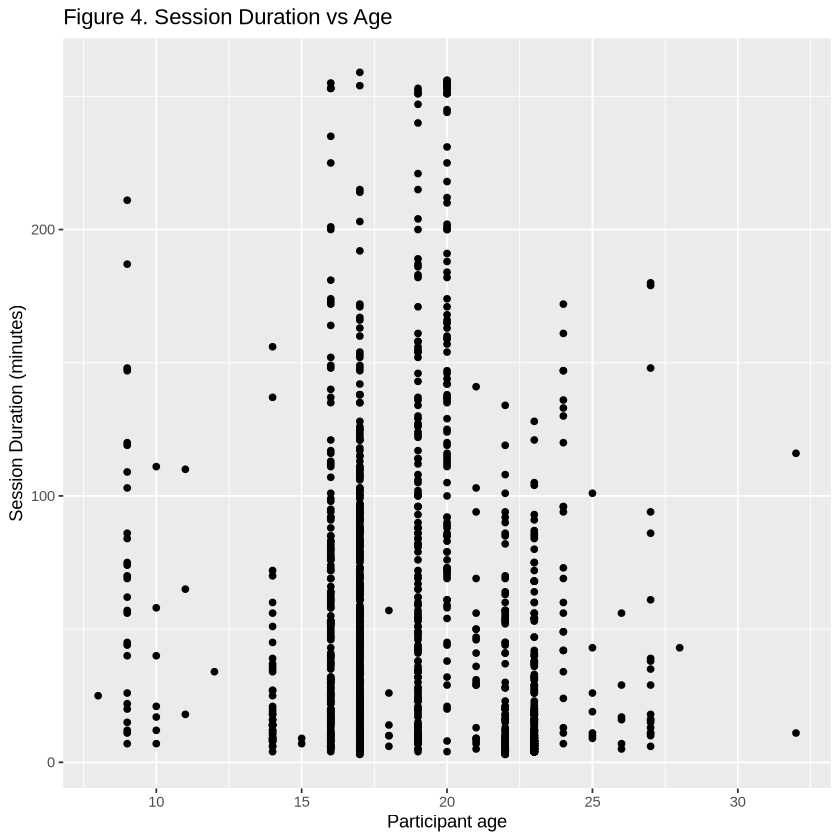

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


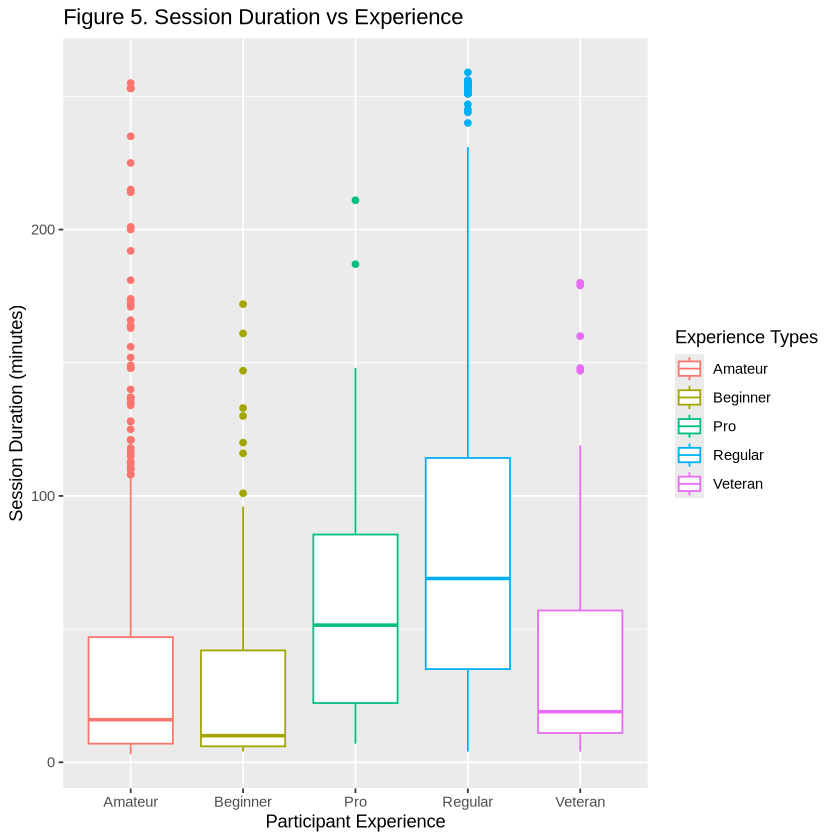

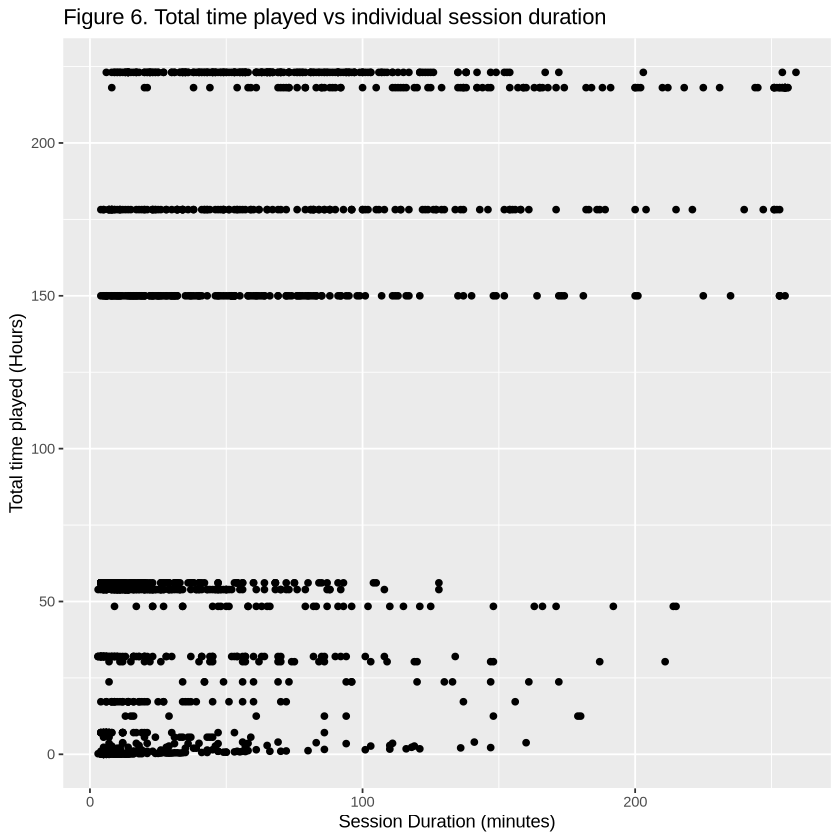

In [7]:
#Figure 4 showing session duration vs age
time_vs_age <- joined_data |>
    filter(age < 33) |>
    ggplot(aes(x = age, y = session_duration)) +
    geom_point() +
    labs(x = "Participant age", y = "Session Duration (minutes)", title = "Figure 4. Session Duration vs Age")
time_vs_age

#Figure 5
time_vs_exp <- joined_data |>
    filter(age < 33) |>
    ggplot(aes(x = experience, y = session_duration, color = experience)) +
    geom_boxplot() +
    labs(x = "Participant Experience", y = "Session Duration (minutes)", title = "Figure 5. Session Duration vs Experience", color = "Experience Types")
time_vs_exp

#Figure 6
time_vs_duration <- joined_data |>
    filter(age < 33) |>
    ggplot(aes(x = session_duration, y = played_hours)) +
    geom_point() +
    labs(x = "Session Duration (minutes)", y = "Total time played (Hours)", title = "Figure 6. Total time played vs individual session duration")
time_vs_duration

### Data analysis

To address this question, linear regression was chosen as it would assist in allowing us to perceive the relationship between session duration, age, and experience level in an interpretable method. By considering all data values and creating coefficients to show a relationship between the variables, we believed this method to be more effective in answering the question. Other models like KNN regression primarily focus on nearby data points to make predictions which would not be as appropriate for our data set since generalizations can sometimes be an issue (especially with the age distribution being quite spread out after age 24). Moreover, linear regression is better for working with large datasets and providing results that are easy to understand.

In [8]:
data_training<- data_training|>
                filter(age<33) #this was the outlier
#Linear Regression Model
linear_regression_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

#Linear Regression Recipe
linear_regression_recipe <- recipe(session_duration ~ age + experience, data = data_training)

#Create a workflow to combine model and recipe
linear_regression_fit <- workflow() |>
  add_recipe(linear_regression_recipe) |>
  add_model(linear_regression_spec) |>
  fit(data = data_training)

linear_regression_fit

linear_regression_test_results <- linear_regression_fit |>
  predict(data_testing) |>
  bind_cols(data_testing) |>
  metrics(truth = session_duration, estimate = .pred)

linear_regression_test_results

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
       (Intercept)                 age  experienceBeginner       experiencePro  
           48.3717             -0.7646             -8.0349             22.5124  
 experienceRegular   experienceVeteran  
           49.3717              9.6762  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,50.4134269
rsq,standard,0.1817855
mae,standard,37.1502074


### Visualization of data analysis

Warning message:
“Removed 25 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 40 rows containing missing values or values outside the scale range
(`geom_line()`).”


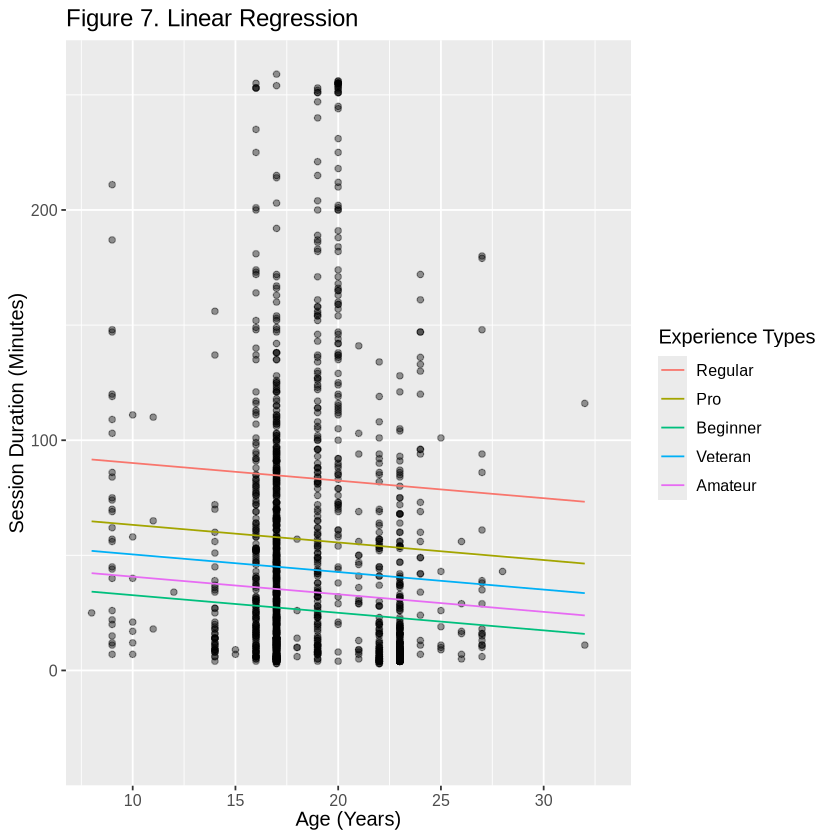

In [9]:
#Made a grid useful for visualizing and predicting across age and experience combinations
ages <- joined_data |> 
        distinct(age) |> 
        pull(age)

experiences <- joined_data |> 
        distinct(experience) |> 
        pull(experience)

#Makes a dataframe with all possible combinations of ages and experiences (expand.grid Function - RDocumentation, n.d.)
session_duration_prediction_grid <- expand.grid(age = ages, experience = experiences) 

#Superimpose this onto prediction lines on the scatter plot to qualitatively assess if the model seems to fit the data well.
sessions_duration_pred <- linear_regression_fit |>
predict(session_duration_prediction_grid)|>
bind_cols(session_duration_prediction_grid)

#Visualization of the scatterplot from linear regression
final_plot <- joined_data |>
            ggplot(aes(x = age, y = session_duration))+
            geom_point(alpha = 0.4)+
            geom_line(data = sessions_duration_pred,
                      mapping = aes(x = age, y = .pred, color = experience))+
            labs(x = "Age (Years)", y = "Session Duration (Minutes)", color = "Experience Types")+
            ggtitle("Figure 7. Linear Regression")+
            xlim(c(8,33))+ #outlier was found to be 33 or above so set a limit
            theme(text = element_text(size = 12))
final_plot

## Discussion

### Summarizing what we found
The data analysis indicated that player age and experience level are moderately predictive of average session duration. Younger players, particularly those aged around 17, exhibited higher playtime durations on average regardless of experience level. Moreover, the linear regression model does imply that players should technically have shorter session durations as their age increases (which applies to every single experience level). Furthermore, we found that there is room for improvement in the predictive capabilities of our model as reflected in the Root Mean Square Prediction Error (RMSPE) of approximately 50. This would indicate that on average our model’s predictions deviate from true session durations by approximately 50 minutes. Such a high RMSPE highlights the need for further refinement to improve the regression model’s accuracy. 

### Expected findings vs outcome
We had anticipated a strong correlation between age, experience, and playtime duration with younger players of higher experience levels correlating to longer session durations. With our data analysis, we found that younger players had longer playtime durations on average, which aligned with our initial expectations. However, our model indicated that younger players had higher playtime durations relative to older players REGARDLESS of experience level. Moreover, the model’s performance suggests that additional factors beyond age and experience likely influence average playtime.

### What impact could such findings have?
These findings could inform game developers about key demographic trends, which would allow them to bring in more players with tailored content and engagement strategies. Knowing that younger players regardless of experience level tend to have longer session durations can help developers in designing content that caters to their preferences. Moreover, insights into session durations of players could guide server management in anticipating periods of high activity and thereby allocating resources accordingly. 

### What future questions could this lead to?
1) How do time-of-day and seasonal trends affect player activity?
2) Can we identify player types most likely to transition toward higher experience levels?
3) Is there a significant difference in playtime duration between solo players and those who play in groups?
4) Which ages provide the most sessions over a given time period?

## References

*expand.grid function - RDocumentation*.(n.d.).
    
    https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/expand.grid